In [2]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

In [56]:
class LinearRegressionLR():
        
    def fit(self,x_train, y_train, alpha, b_0, b_1, eps,max_iter, trashhold):
        print("FIT")
        iteracii = 0
        self.b=[b_0,b_1]
        self.b_0 = b_0
        self.b_1 =  b_1
        
        while True:
            y_pred= self.predict(x_train, trashhold)
            d_mse_b1 = (1/y_train.size)*np.sum(x_train*(y_train-y_pred))
            d_mse_b0 = (1/y_train.size)*np.sum((y_train-y_pred))
            b_1_new = b_1 -alph*d_mse_b1
            b_0_new = b_0 -alph*d_mse_b0
            iteracii+=1
            if b_0-b_0_new < eps or b_1-b_1_new < eps or iteracii >max_iter:
                break
            b_0=b_0_new
            b_1=b_1_new
            self.b_0 = b_0
            self.b_1=b_1
            self.b=[b_0,b_1]
        return b_0, b_1
    
    def predict(self, x_train, trashhold):
        y_pred = 1 /(1+np.exp(self.b_0 + self.b_1*x_train))   #np.exp(self.b_0 + self.b_1*x_train)
        self.y_pred = y_pred
        return y_pred
    
    def predict_bool(self, trashhold):
        #print(y_pred.size)
        y_pred_bool = np.ones(len(y_pred))
        print(y_pred_bool)
        y_pred_bool = self.y_pred
        y_pred_bool[y_pred_bool>trashhold] = 1
        y_pred_bool[self.y_pred<trashhold] = 0
        print(y_pred_bool.T, "y_pred_bool ###")
        self.y_pred_bool= y_pred_bool
        return y_pred_bool
    
    def get_coeffs(self):
        print("\nCOEFFS")
        print("",self.b_0, "   b0 \n",self.b, "   b")
        return self.b_0,self.b
    
    def accuracy(self,y_test):
        val = np.sum(self.y_pred_bool == y_test)/len(y_test)
        print("ACCURACY\n",val)
        return val
b_1=1
b_0=2
trash = 0.5
alph = 0.001
eps = 0.00001
max_iter = 1000
x=np.arange(10)
y=np.array([0,0,0,1,0,1,1,1,1,1])
x=x.reshape(-1,1)
LR = LinearRegressionLR()
LR.fit(x,y,alph,b_0,b_1, eps, max_iter, trash)
y_predict =LR.predict(x,trash)
print(y_predict.T)
y_pred_bool =LR.predict_bool(trash)
accur = LR.accuracy(y)


FIT
[[0.16261568 0.21237822 0.27241483 0.34205253 0.41923452 0.50058193
  0.58189854 0.65899442 0.72850692 0.78839947]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]] y_pred_bool ###
ACCURACY
 5.0


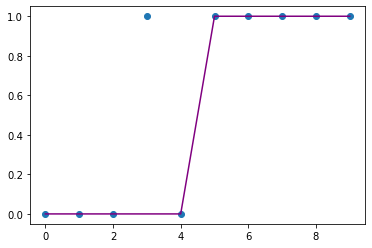

In [57]:
plt.scatter(x,y)
plt.plot(x,y_pred_bool,color='purple')